In [19]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
names = open(r"names.txt")
lstnames=list()
for i,n in enumerate(names):
    n=n[0:len(n)-1]
    n="."+n+"."
    lstnames.append(n)

In [11]:
bigrams=[]
uchars = set()
for n in lstnames:
    for ch1,ch2 in zip(n[:],n[1:]):
        bigrams.append(ch1+ch2)
    for c in n:
        uchars.add(c)
lstuchars = list(uchars)       

uchars


In [13]:
lstuchars=sorted(lstuchars)

In [55]:
itostr = {}
strtoi={}
for i,c in enumerate(lstuchars):
    itostr[i]=c
    strtoi[c]=i

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

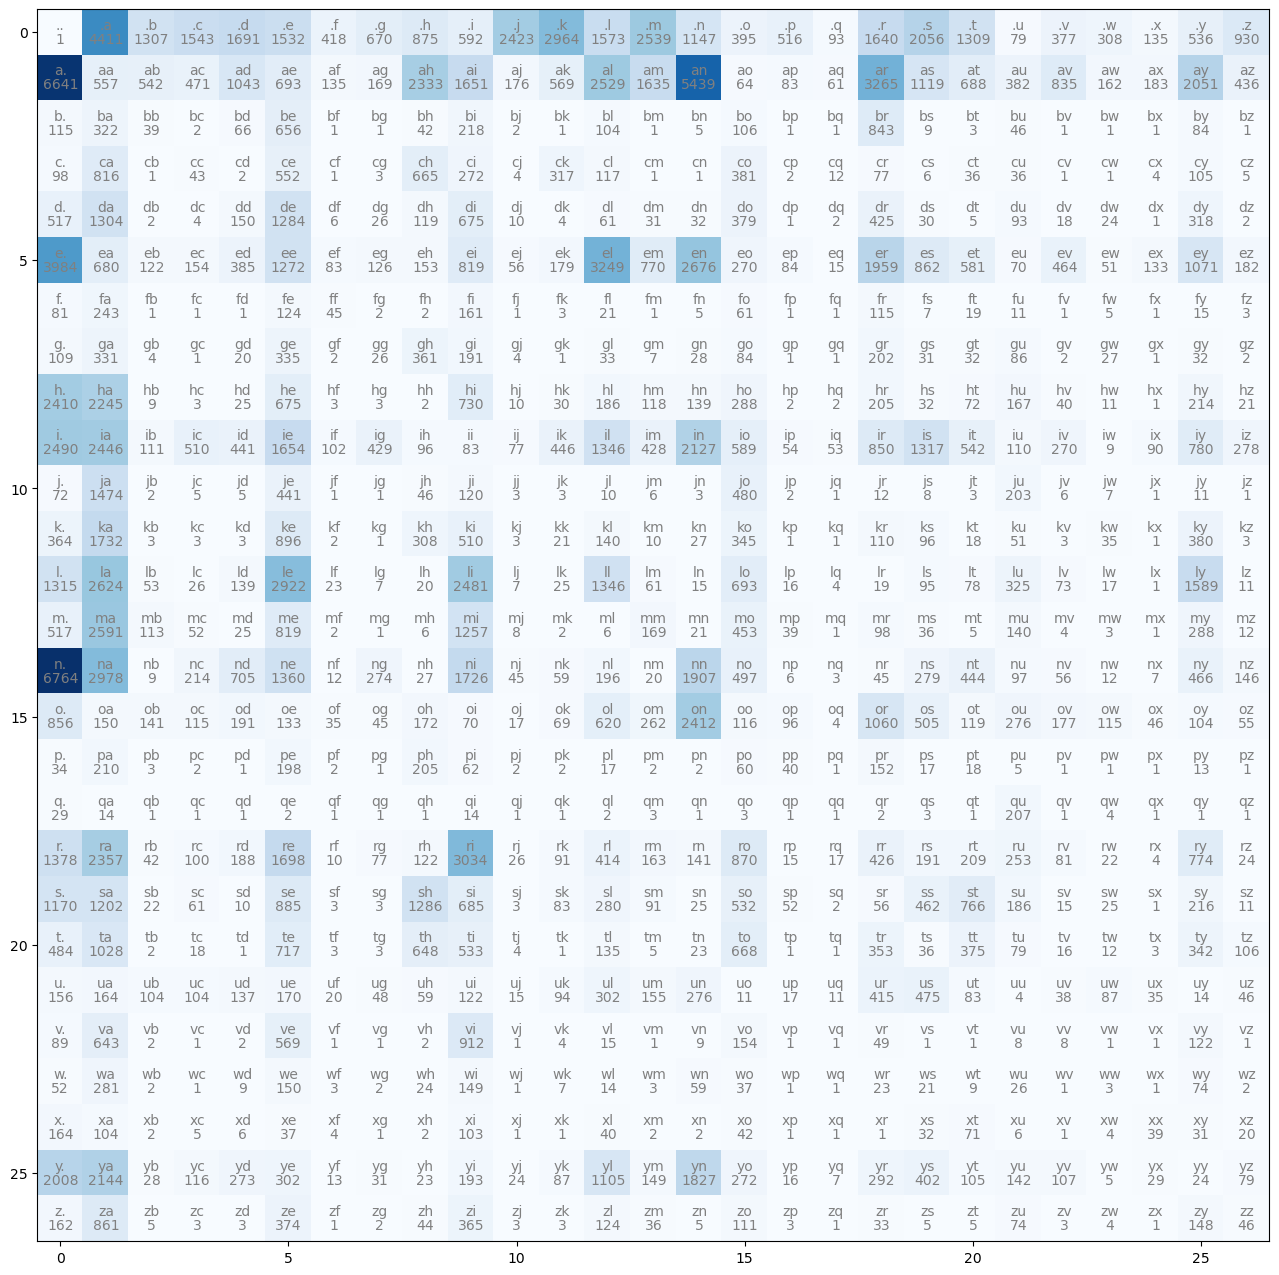

In [156]:
bigramarray = np.ones((len(lstuchars),len(lstuchars)),dtype = np.int32)
for ch in bigrams:
    bigramarray[strtoi[ch[0]],strtoi[ch[1]]] = bigramarray[strtoi[ch[0]],strtoi[ch[1]]] + 1
plt.figure(figsize=(16,16))
plt.imshow(bigramarray,cmap = "Blues")
for i in range(len(lstuchars)):
    for j in range(len(lstuchars)):
       plt.text(j,i,itostr[i]+itostr[j],va = "bottom",ha = "center",color="gray")
       plt.text(j,i,bigramarray[i,j],va = "top",ha = "center",color="gray")

tbigramarray = torch.from_numpy(bigramarray)
itostr

In [51]:

p=torch.rand(3,generator=g)
p
torch.multinomial(p,20,replacement=True,generator=g)

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [157]:
gnames = []
tbigramarray = tbigramarray.float()
P = tbigramarray/torch.sum(tbigramarray,dim=1,keepdim=True)
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix=0
    c=""
    while True:
        ix = torch.multinomial(P[ix],1,replacement=True,generator=g).item()
        # print(itostr[ix])
        c = c+itostr[ix]
        if ix==0:
            gnames.append(c)
            break
gnames

['junide.',
 'janasah.',
 'p.',
 'cony.',
 'a.',
 'nn.',
 'kohin.',
 'tolian.',
 'juee.',
 'ksahnaauranilevias.']

In [136]:
torch.sum(tbigramarray,dim=1,keepdims=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  696.],
        [ 9776.],
        [ 2398.]])

In [159]:
n=0
lh=0

for name in ['.andrejq.']:
    
    for ch1,ch2 in zip(name,name[1:]):
        # print(ch1,ch2)
        ix1 = strtoi[ch1]
        ix2 = strtoi[ch2]
        lh = lh+ torch.log(P[ix1,ix2])
        n+=1
        print(f"prob of {ch1+ch2}:{ P[ix1,ix2].item():.4f} logprob: {torch.log(P[ix1,ix2]):.4f}")
print(f"loglikelihood:{lh}")
print(-lh/n)


prob of .a:0.1376 logprob: -1.9835
prob of an:0.1604 logprob: -1.8302
prob of nd:0.0384 logprob: -3.2594
prob of dr:0.0770 logprob: -2.5646
prob of re:0.1334 logprob: -2.0143
prob of ej:0.0027 logprob: -5.9004
prob of jq:0.0003 logprob: -7.9817
prob of q.:0.0970 logprob: -2.3331
loglikelihood:-27.867216110229492
tensor(3.4834)


In [237]:
import torch.nn.functional as F
g=torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),requires_grad=True,generator=g)
lstx=[]
lsty=[]
for name in lstnames:
    
    for ch1,ch2 in zip(name,name[1:]):
        xs = strtoi[ch1]
        ys = strtoi[ch2]
        lstx.append(xs)
        lsty.append(ys)
num = len(lstx)
print(f"no of examples: {num}")


no of examples: 228145


In [239]:
for b in range(100):
    X = F.one_hot(torch.tensor(lstx),num_classes = 27).float()
    Y = torch.tensor(lsty)
    logits = (X@W)
    ps = torch.exp(logits)
    s = torch.sum(ps,axis=1,keepdims=True)
    Ps = ps/s
    loglhood = torch.log(Ps[np.arange(0,len(lstx)),Y])
    loss = -loglhood.mean()
    print(loss.item())
    W.grad=None
    loss.backward()
    W.data = W.data - 50*W.grad

2.4726474285125732
2.472428798675537
2.472214937210083
2.4720053672790527
2.4718005657196045
2.471599817276001
2.4714035987854004
2.4712109565734863
2.471022605895996
2.4708378314971924
2.4706568717956543
2.4704794883728027
2.470305919647217
2.47013521194458
2.469968318939209
2.469804525375366
2.4696438312530518
2.4694862365722656
2.4693315029144287
2.46917986869812
2.4690308570861816
2.4688847064971924
2.4687414169311523
2.4686005115509033
2.4684619903564453
2.4683260917663574
2.4681925773620605
2.468061923980713
2.467932939529419
2.467806339263916
2.467682123184204
2.467559814453125
2.467439651489258
2.4673213958740234
2.467205286026001
2.4670910835266113
2.4669787883758545
2.4668684005737305
2.4667599201202393
2.4666528701782227
2.4665474891662598
2.4664440155029297
2.4663422107696533
2.4662418365478516
2.4661431312561035
2.4660463333129883
2.4659507274627686
2.4658563137054443
2.465763568878174
2.465672016143799
2.4655821323394775
2.4654934406280518
2.4654064178466797
2.46532011032

In [218]:
W.grad=None
loss.backward()
# W = W - 0.1*W.grad
print(loglhood)
print(loss)
print(W.grad)
W.data = W.data - 0.1*W.grad

tensor([-4.3774, -3.9937, -3.6039, -2.5905, -4.1805], grad_fn=<LogBackward0>)
tensor(3.7492, grad_fn=<NegBackward0>)
tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0474,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000